# Mouvement rétrograde de Mars
**Modélisation Numérique en Physique - S2**

**Miniprojet 1**

**ARGUELLO Camilo**

## Tableau

1. Introduction
2. Mouvement Circulaire Uniforme (MCU)
3. Modelisation
4. Données
5. Résultats
6. Conclusion

## Introduction

Notre système solaire est toujours en mouvement constante avec les planètes au tour du soleil. La plupart de ces planètes sont visibles dépuis la terre. Si nous essayons de suivre la position de chacune, on peut remarquer qu'elle change légèrement lorsque chaque planète orbite autour du soleil. Les planètes semblent se deplacer vers l'est sur un fond fixé des étoiles loin de notre système solaire.

Cependant, il y a des moments où certaines planètes semblent inverser la direction et voyager en arriere (vers l'ouest), mais après quelques temps, ils reprennent leur cours habituel.

> Ce mouvement est appellé: Mouvement rétrograde

Pour bien comprendre le phénomène, nous allons modéliser le mouvement de la Terre, ainsi que de Mars autour du soleil.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from sklearn.metrics import explained_variance_score

## Mouvement Circulaire Uniforme (MCU)

Le mouvement entre la Terre et Mars peut-être considéré comme un mouvement circulaire uniforme, car les deux planètes ont des trajectoires sur le réferentiel de la orbite du soleil. Ainsi, on peut considérer par exemple que la vitesse est constante.

Si on se place dans un plan (x,y), et on considére le soleil dans le centre du plan. La Terre et Mars tourneront autour du soleil. Les deux planètes ont une distance $r$ par rapport le soleil, ainsi que une période.

Les équations du mouvement circulaire uniforme (MCU), peuvent être obtenus de la même manière que celles du mouvement rectiligne uniforme, mais en considérant les grandeurs angulaires, au lieu des grandeurs linéaires.

Pour un MCU, la vitesse angulaire $\omega$ est constante, et elle peut se trouver avec la période $T$ du chaque planète:

$$ \omega = \frac {2\pi} {T} $$

On peut deduire l'expression qui donne l'angle entre le centre $O$ et un point $M$.

$$ \theta (t)=\omega t+\theta _{0} $$

Où, $\theta _{0}$ est l'angle initial.

Dans le point $M$, on peut aussi trouver les coordonées en fonction du temps.

$$ x_M(t) = r . \cos{( \theta(t) )} $$
$$ y_M(t) = r . \sin{( \theta(t) )} $$

Avec $r$ comme le rayon entre le centre $O$ et le point $M$. Cependant, lorsqu'on se place dans un mouvement heliocentrique, on va considérer aussi l'angle $ \phi_{app} $ dépuis la Terre. 

![modelisation](https://phys-mod.github.io/_images/solar.png "Modelisation")


## Modelisation

On va modeliser le problème comme un système circulaire uniforme de deux corps autour du centre. Pour faire cela, on va définir des grandeurs utiles:

In [2]:
# Constants

T_terre = 365.256 # jours
R_s_t = 1 # UA
T_mars = 686.885 #jours
R_s_m = 1.52371 # UA

On calcule la vitesse angulaire pour chaque planète:

In [3]:
# Angular velocity for earth and mars

w_t = 2 * np.pi / T_terre # rad / s
print("w_terre",np.around(w_t, 2),"rad/s")

w_m = 2 * np.pi / T_mars # rad / s
print("w_mars",np.around(w_m, 2),"rad/s")

w_terre 0.02 rad/s
w_mars 0.01 rad/s


In [4]:
# Function to plot the planet displacement for a set of points in the cartesian coordinates

def plot_planet(ax, x_t, y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0, i ):
    """
    @desc
        This function takes each axis and prints the mars and earth trajectory
        Moreover, it plots some particular points to show the Mars retrograde effect
        
    @param {object} ax Current axis
    @param {array} x_t Total Earth trajectory in X
    @param {array} y_t Total Earth trajectory in Y
    @param {array} x_t_0 Specific Earth trajectory in X(t = ?)
    @param {array} y_t_0 Specific Earth trajectory in Y(t = ?)
    @param {array} x_m Total Mars trajectory in X
    @param {array} y_m Total Mars trajectory in Y
    @param {array} x_m_0 Specific Mars trajectory in X(t = ?)
    @param {array} x_m_0 Specific Mars trajectory in Y(t = ?)
    @param {int} i index
    """
    xx_range = [-2, 2]
    yy_range = [-3, 4]
    
    # sun
    ax.scatter(0,0, c="orange",s=100, label="Soleil")
    
    # earth
    ax.plot( x_t, y_t , label="Terre", c="blue")
    ax.plot(x_t_0,y_t_0, 'o', c="blue")
    
    # mars
    ax.plot( x_m, y_m , label="Mars", c="red")
    ax.plot(x_m_0,y_m_0, 'o', c="red")
    
    ax.set_title("Terre-Mars trajectoire - jour="+str(i),fontsize=8)

    # Defining viewport limits
    ax.set_xlim(*xx_range)
    ax.set_ylim(*yy_range)
    
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_position('zero')
    ax.spines['top'].set_color('none')
    
    ax.grid(True)
    ax.legend()

    ax.set_aspect( 1 )


Pour faire une analyse plus simple, nous allons travailler avec la periode de Mars. Donc, on va se situer dans la situation d'un tour de Mars autour du soleil. On définit le temps maximum, le temps que met Mars pour faire ce voyage, et on fait la comparaison avec la Terre.

Ici, on va comparer à différents points aléatoires et en utilisant une équation linéaire, on va trouver la pente entre les deux points et puis on pourra tracer une ligne entre chaque planète au cours de temps.

Pour l'initialisation de notre modèle, on se place en $t=0$ avec Mars et la Terre alignées horizontalement.

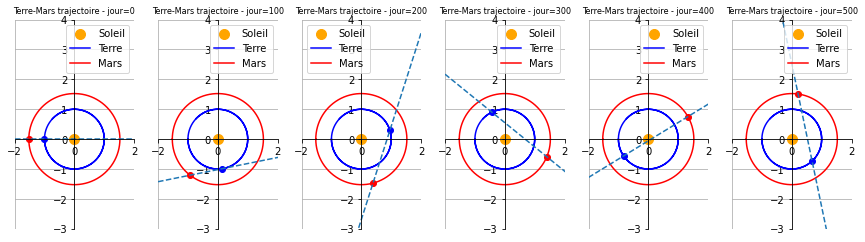

In [17]:
# I consider the period of mars to define the time
# One lap of mars to analyse the mouvement with the earth
# The 900 are strictly related with the number of rows in the data to compare with
t = np.linspace(0, T_mars, 900) # jours

fig, (ax1,ax2,ax3,ax4,ax5,ax6) = plt.subplots( 1,6, figsize=(15,15) ) 

# Initialization of theta (theta_0) for earth and mars in rads
th_0_t = np.pi
th_0_m = np.pi

# The range is between the t=900
for i in range(0,900,1):
    #print("for i=" + str(i))
    
    # MCU
    th_t = w_t * t + th_0_t # rad
    th_m = w_m * t + th_0_m # rad
    
    x_t = R_s_t * np.cos( th_t ) 
    y_t = R_s_t * np.sin( th_t ) #+ 1
    
    x_t_0 = R_s_t * np.cos( w_t * np.array([i]) + th_0_t )
    y_t_0 = R_s_t * np.sin( w_t * np.array([i]) + th_0_t ) #+ 1

    x_m = R_s_m * np.cos( th_m )
    y_m = R_s_m * np.sin( th_m ) #+ 1
    
    x_m_0 = R_s_m * np.cos( w_m * np.array([i]) + th_0_m )
    y_m_0 = R_s_m * np.sin( w_m * np.array([i]) + th_0_m ) #+ 1
    
    point1 = np.array([x_t_0,y_t_0])
    point2 = np.array([x_m_0,y_m_0])
    
    # slope
    slope = (point2[1] - point1[1]) / (point2[0] - point1[0])
    line_x = np.arange(-2, 3, .1)
    
    # Find the y-intercept
    b = point2[1] - ( point2[0] * slope)
    
    # Linear equation y = xm + b
    line_y = line_x * slope + b
    
    # Randomly times
    if i == 0:
        plot_planet(ax1,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax1.plot(line_x,line_y, "--")

    if i == 100:
        plot_planet(ax2,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax2.plot(line_x,line_y,"--")

    if i == 200:
        plot_planet(ax3,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax3.plot(line_x,line_y,"--")

    if i == 300:
        plot_planet(ax4,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax4.plot(line_x,line_y,"--")

    if i == 400:
        plot_planet(ax5,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax5.plot(line_x,line_y,"--")

    if i == 500:
        plot_planet(ax6,x_t,y_t, x_t_0, y_t_0, x_m, y_m, x_m_0, y_m_0,i )
        ax6.plot(line_x,line_y,"--")

plt.show()

In [18]:
# MCU
th_t = w_t * t + th_0_t # rad
th_m = w_m * t + th_0_m # rad

x_t = R_s_t * np.cos( th_t ) 
y_t = R_s_t * np.sin( th_t )

x_m = R_s_m * np.cos( th_m )
y_m = R_s_m * np.sin( th_m )

# The displacement between Mars - Earth is given by the difference of points between mars and earth
# By considering the heliocentrism (planets around the sun) 
phi = np.rad2deg(np.arctan2((y_m - y_t),(x_m - x_t)))

La variable $phi$ contient l'information concernant l'angle entre les deux planètes.

## Données

Pour vérifier le modèle, on va comparer avec des données astronomiques qui contient l'information des angle de déplacement de mars dépuis la terre.

In [19]:
df = pd.read_csv("DataMars.csv", index_col = 0, encoding = 'utf-8', comment='#')

In [20]:
df.head(n=2)

,Date,Longitude (d:m:s),Longitude (decimal),Latitude (d:m:s),Latitude (decimal)
Target,,,,,
Mars,2015-03-01,6 41 13.6229,6.687117,-00 29 17.9130,-0.488309
Mars,2015-03-02,7 27 2.2465,7.450624,-00 28 35.5370,-0.476538


In [21]:
dates = np.array([np.datetime64(date) for date in df['Date']])

## Résultats

On a fait une première approximation, en remarquant que pendant l'année 2016 on peut observer l'info liée au mouvement retrograde de Mars.

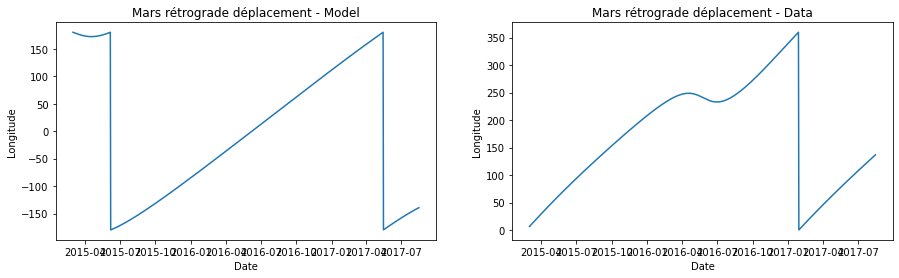

In [22]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,4))

ax1.plot(np.array(dates), phi)
ax1.set_title("Mars rétrograde déplacement - Model")
ax1.set_ylabel("Longitude")
ax1.set_xlabel("Date")

ax2.set_title("Mars rétrograde déplacement - Data")
ax2.set_ylabel("Longitude")
ax2.set_xlabel("Date")
ax2.plot(np.array(dates),df['Longitude (decimal)'])

Maintenant, on va ajouter les résultats trouvés dans le `dataframe` pour pouvoir filtrer selon une date précise.

In [23]:
# Here I create a new column in the dataframe
# The goal is to filtrate later
df['phi'] = phi

In [24]:
df.head(n=2)

,Date,Longitude (d:m:s),Longitude (decimal),Latitude (d:m:s),Latitude (decimal),phi
Target,,,,,,
Mars,2015-03-01,6 41 13.6229,6.687117,-00 29 17.9130,-0.488309,180.000000
Mars,2015-03-02,7 27 2.2465,7.450624,-00 28 35.5370,-0.476538,179.727203


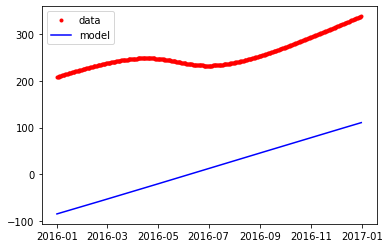

In [25]:
# The goal is to compare model and data
# I filter by the most interesting year -> 2016
# Then I plot both (data & model)

data_in_2016 = [np.datetime64(day,'Y') == np.datetime64('2016') for day in df['Date']]
df_2016 = df[data_in_2016]
dates_2016 = np.array([np.datetime64(date) for date in df_2016['Date']])

plt.plot(dates_2016,df_2016['Longitude (decimal)'], ".", label="data", c="red")
plt.plot(dates_2016,df_2016['phi'], label="model", c="blue")
plt.legend()

In [14]:
y_true = df_2016['Longitude (decimal)']
y_pred = df_2016['phi']

In [15]:
# Best possible score is 1.0, lower values are worse.
explained_variance_score(y_true, y_pred)

0.37461799061603773

## Conclusions

On a créé un modèle capable de reproduire le mouvement rétrograde de Mars, ce modèle prend en compte le mouvement héliocentrique des planètes comme s'il s'agissait d'un mouvement circulaire uniforme autour du soleil. 

Dans les résultats, on peut voir qu'on a bien obtenu un effet rétrograde de Mars, cependant il est diffèrent par l'angle obtenu dans les données.